In [1]:
import cv2
import matplotlib.pyplot as plt
import os
from glob import glob

In [2]:
CLASS_NAMES = {
    0: 'light_blue',
    1: 'dark_blue',
    2: 'other'
}

In [3]:
COLORS = {
    0: (173, 216, 230),  # Light Blue
    1: (0, 0, 139),      # Dark Blue
    2: (255, 165, 0)     # Other (Orange)
}

In [4]:
def visualize_yolo_labels(image_path, class_names, colors):
    """
    Reads a YOLO-annotated image and displays it with
    bounding boxes and labels.
    """
    
    label_path = image_path.replace("images", "labels").replace(
        ".jpg", ".txt"
    ).replace(".png", ".txt")
    
    if not os.path.exists(image_path):
        print(f"Error: Image file not found at {image_path}")
        return
        
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    h, w, _ = image.shape
    
    if not os.path.exists(label_path):
        print(f"Warning: Label file not found for {image_path}")
        labels = []
    else:
        with open(label_path, 'r') as f:
            labels = f.readlines()
            
    for label in labels:
        try:
            parts = label.strip().split()
            class_id = int(parts[0])
            x_c = float(parts[1])
            y_c = float(parts[2])
            box_w = float(parts[3])
            box_h = float(parts[4])
            
            x1 = int((x_c - box_w / 2) * w)
            y1 = int((y_c - box_h / 2) * h)
            x2 = int((x_c + box_w / 2) * w)
            y2 = int((y_c + box_h / 2) * h)
            
            color = colors.get(class_id, (255, 255, 255)) 
            label_text = class_names.get(class_id, f"UNKNOWN: {class_id}")
            
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), color, 2)
            
            cv2.rectangle(image_rgb, (x1, y1 - 20), (x1 + len(label_text) * 10, y1), color, -1)

            cv2.putText(image_rgb, label_text, (x1, y1 - 5), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
            
        except Exception as e:
            print(f"Error processing line '{label.strip()}': {e}")

    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title(f"Inspecting: {image_path}")
    plt.axis('off')
    plt.show()

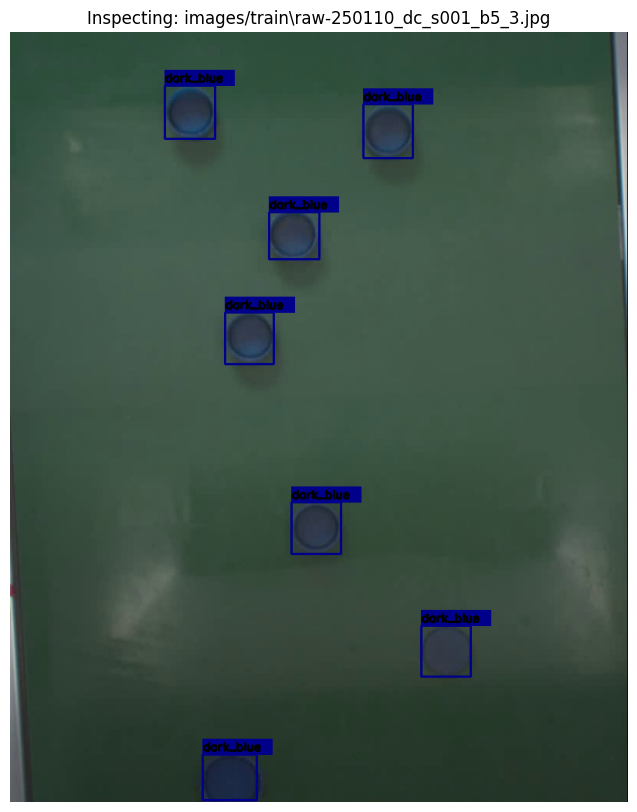

In [5]:
train_images = glob("images/train/*.jpg")
if train_images:
    visualize_yolo_labels(train_images[9], CLASS_NAMES, COLORS)
else:
    print("No training images found in 'images/train/'")

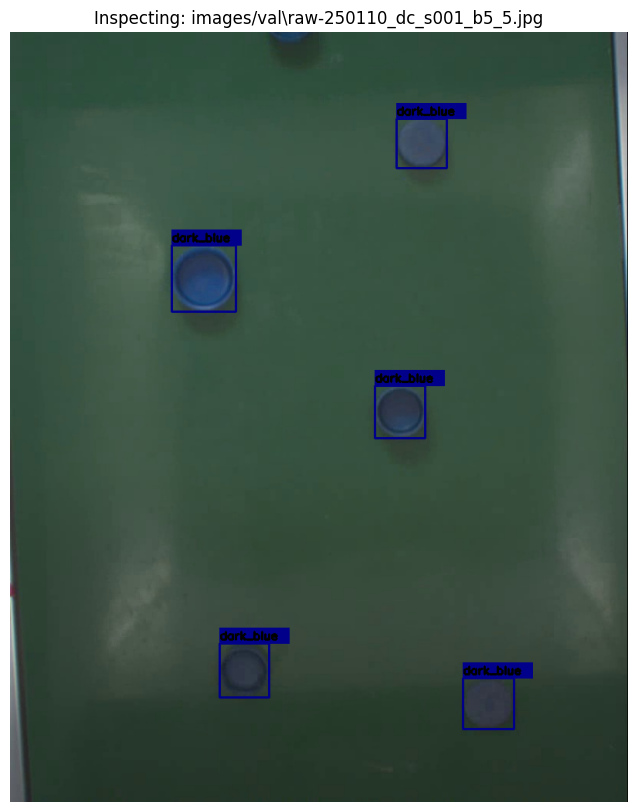

In [6]:
val_images = glob("images/val/*.jpg")
if val_images:
    visualize_yolo_labels(val_images[1], CLASS_NAMES, COLORS)
else:
    print("No validation images found in 'images/val/'")